## Kelompok 4
1. Ardyn Rezky Fahreza (2103551)
2. Muhammad Fikri Kafilli (2107264)
3. Bayu Wicaksono (2106836)
4. Muhammad Fadlan Ghafur (2106923)
5. Talitha Syahla (2101330)

## Praproses Data
##### Memperbaiki nama atribut di tiap dataframe
+ mengubah nama atribut menjadi lowercase
+ mengubah " " dan "." menjadi "_"

##### Mengubah datatype atribut
+ mengubah datatype atribut gender menjadi category
+ mengubah datatype atribut gol menjadi category dan mengurutkannya sesuai tingkatan
+ mengubah datatype atribut sinta_3yr_score dan sinta_score menjadi float

##### Transformasi data
+ transformasi atribut gender, awalnya 1 dan 2 menjadi M dan F

##### mengatasi data NaN dan data yang tidak masuk akal
+ data atribut thn_lahir yang lebih dari 9000 dan kurang dari 1000, diisi dengan menggunakan atribut gol
+ data atribut gol yang NaN diisi dengan menggunakan atribut jabatan_fungsional dan pendidikan_terakhir
+ data atribut nama_prodi yang NaN diisi dengan "Tidak diketahui"
+ pada dataframe sinta dosen, banyak data yang NaN sehingga solusi yang kami berikan adalah mengisinya dengan 0

##### Melakukan drop pada atribut
+ atribut affil_score dan affil_3yr_score di drop karena datanya hanya berisi 0

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [2]:
df = pd.read_csv("C:\\Users\\Byebay\\Documents\\College\\Data Mining\\tugas\\tugas 1\\Data_Dosen_Juni_2022_ANON - data_sinta.csv")
df.head(5)

,kode_nama,scopus_h_index,googlescholar_h_index,sinta_3yr_score,sinta_score,affil_3yr_score,affil_score
0,C0233C4F,3.0,10.0,223,443,0.0,0.0
1,036A27B5,3.0,27.0,399,703,0.0,0.0
2,E2B61FF1,0.0,11.0,145,356,0.0,0.0
3,A91A80C2,5.0,0.0,976,"1,378",0.0,0.0
4,5E1CA9C9,2.0,12.0,250,420,0.0,0.0


In [9]:
df1 = pd.read_csv("C:\\Users\\Byebay\\Documents\\College\\Data Mining\\tugas\\tugas 1\\Data_Dosen_Juni_2022_ANON - dosen.csv")
df1.head(5)

,thn_lahir,kode_nama,gender,Stat.Peg,Gol,Jabatan Fungsional,Pendidikan Terakhir,Fakultas,Nama Prodi
0,1962,C0233C4F,1,PNS,IV/c,Guru Besar,S3,FIP,Bimbingan Dan Konseling (S3)
1,1953,036A27B5,1,PNS,IV/e,Guru Besar,S3,FIP,Pengembangan Kurikulum (S3)
2,1954,E2B61FF1,2,PNS,IV/e,Guru Besar,S3,FIP,Pendidikan Masyarakat (S3)
3,1955,A91A80C2,1,PNS,IV/e,Guru Besar,S3,FIP,Pendidikan Khusus (S3)
4,1961,5E1CA9C9,1,PNS,IV/e,Guru Besar,S3,FIP,Pendidikan Masyarakat (S2)


#### Mengeksplorasi dataset dosen

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   thn_lahir            1510 non-null   int64 
 1   kode_nama            1510 non-null   object
 2   gender               1510 non-null   int64 
 3   Stat.Peg             1510 non-null   object
 4   Gol                  1483 non-null   object
 5   Jabatan Fungsional   1510 non-null   object
 6   Pendidikan Terakhir  1510 non-null   object
 7   Fakultas             1510 non-null   object
 8   Nama Prodi           1490 non-null   object
dtypes: int64(2), object(7)
memory usage: 106.3+ KB


### Memperbaiki nama atribut di tiap dataframe

In [11]:
df1= df1.rename(columns=str.lower)

In [12]:
df1.columns = df1.columns.str.replace('.','_', regex=True)
df1.columns = df1.columns.str.replace(' ','_', regex=True)

### Mengganti datatype atribut

In [13]:
df1["gender"] = df1["gender"].astype("category")
df1.gol = pd.Categorical(df1.gol,ordered=True,categories=['IV/e','IV/d','IV/c','IV/b', 'IV/a', 'III/d', 'III/c', 'III/b', 'III/a'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   thn_lahir            1510 non-null   int64   
 1   kode_nama            1510 non-null   object  
 2   gender               1510 non-null   category
 3   stat_peg             1510 non-null   object  
 4   gol                  1483 non-null   category
 5   jabatan_fungsional   1510 non-null   object  
 6   pendidikan_terakhir  1510 non-null   object  
 7   fakultas             1510 non-null   object  
 8   nama_prodi           1490 non-null   object  
dtypes: category(2), int64(1), object(6)
memory usage: 86.1+ KB


### Transformasi data atribut gender

In [14]:
df1.gender = df1.gender.replace({1: "M", 2: "F"})
df1.head(2)

,thn_lahir,kode_nama,gender,stat_peg,gol,jabatan_fungsional,pendidikan_terakhir,fakultas,nama_prodi
0,1962,C0233C4F,M,PNS,IV/c,Guru Besar,S3,FIP,Bimbingan Dan Konseling (S3)
1,1953,036A27B5,M,PNS,IV/e,Guru Besar,S3,FIP,Pengembangan Kurikulum (S3)


### Mengecek data NaN pada dataframe dosen

In [15]:
df1.isna().sum()

thn_lahir               0
kode_nama               0
gender                  0
stat_peg                0
gol                    27
jabatan_fungsional      0
pendidikan_terakhir     0
fakultas                0
nama_prodi             20
dtype: int64

### Mengisi data NaN pada atribut gol

#### Mengelompokkan data di atribut gol

In [16]:
df1.gol.value_counts(dropna=False).sort_index()

IV/e      34
IV/d      54
IV/c      59
IV/b     169
IV/a     209
III/d    270
III/c    198
III/b    480
III/a     10
NaN       27
Name: gol, dtype: int64

#### Melihat data yang NaN pada atribut gol

In [17]:
df1[(df1.gol.isna())]

,thn_lahir,kode_nama,gender,stat_peg,gol,jabatan_fungsional,pendidikan_terakhir,fakultas,nama_prodi
165,1952,243F541E,M,PNS,NaN,Guru Besar,S3,FIP,Pendidikan Khusus (S1)
1133,9202,2D5A2A74,M,PT-P,NaN,Guru Besar,S3,FIP,Bimbingan Dan Konseling (S3)
1134,9202,AFF8E8EA,M,PT-P,NaN,Guru Besar,S3,FIP,Bimbingan Dan Konseling (S3)
1153,9201,CA1ED2A7,M,PT-P,NaN,Guru Besar,S3,FPIPS,Pendidikan Sejarah (S3)
1154,9202,14DCB298,M,PT-P,NaN,Guru Besar,S3,FPIPS,Pendidikan Kewarganegaraan (S3)
1208,9202,DB4A6AF6,M,PT-P,NaN,Guru Besar,S3,FPBS,Pendidikan Bahasa Inggris (S2)
1209,9202,632C11D7,F,PT-P,NaN,Guru Besar,S3,FPBS,Pendidikan Bahasa Inggris (S3)
1229,201,093E4596,M,PTT,NaN,Tenaga Pengajar,S3,FPBS,Pendidikan Bahasa Korea (S1)
1230,201,88680AAA,F,PTT,NaN,Tenaga Pengajar,S2,FPBS,Pendidikan Bahasa Korea (S1)
1231,201,057FF67B,M,PTT,NaN,Tenaga Pengajar,S3,FPBS,Pendidikan Bahasa Korea (S1)


#### Mengisi data NaN di atribut gol

In [18]:
modetp1 = df1.loc[((df1.pendidikan_terakhir == "S2") & (df1.jabatan_fungsional == "Tenaga Pengajar") & (df1.jabatan_fungsional.isna() == False))]['gol'].mode()[0]
df1.loc[(df1["gol"].isna()) & (df1.jabatan_fungsional == "Tenaga Pengajar") & (df1.pendidikan_terakhir == "S2"), 'gol'] = modetp1

In [19]:
modetp2 = df1.loc[((df1.pendidikan_terakhir == "S3") & (df1.jabatan_fungsional == "Tenaga Pengajar") & (df1.jabatan_fungsional.isna() == False))]['gol'].mode()[0]
df1.loc[(df1["gol"].isna()) & (df1.jabatan_fungsional == "Tenaga Pengajar") & (df1.pendidikan_terakhir == "S3"), 'gol'] = modetp2

In [20]:
modegb = df1.loc[((df1.jabatan_fungsional == "Guru Besar") & (df1.jabatan_fungsional.isna() == False))]['gol'].mode()[0]
df1.loc[(df1["gol"].isna()) & (df1.jabatan_fungsional == "Guru Besar"), 'gol'] = modegb

#### Mengecek kondisi data setelah diisi

In [21]:
df1.gol.value_counts(dropna=False).sort_index()

IV/e      34
IV/d      66
IV/c      59
IV/b     169
IV/a     209
III/d    270
III/c    202
III/b    491
III/a     10
Name: gol, dtype: int64

### Memperbaiki data yang tidak masuk akal pada atribut thn_lahir

In [22]:
df1['thn_lahir'] = df1['thn_lahir'].where(((df1.thn_lahir < 9000) & (df1.thn_lahir > 1000)), None)
df1["thn_lahir"] = df1["thn_lahir"].astype("Int64")

#### Mengelompokkan atribut thn_lahir yang None berdasarkan atribut gol

In [23]:
df1.loc[df1.thn_lahir.isna()].gol.value_counts(dropna=False).sort_index()

IV/e       0
IV/d      11
IV/c       0
IV/b       0
IV/a       0
III/d      0
III/c     12
III/b    353
III/a      1
Name: gol, dtype: int64

#### memperbaiki atribut thn_lahir yang None dengan menggunakan atribut gol

In [24]:
df4d = df1.loc[(df1['gol'] == "IV/d") & (df1.thn_lahir.isna() == False)]
df4d = round(df4d.thn_lahir.mean())
df1.loc[(df1["thn_lahir"].isna() == True) & (df1.gol == "IV/d"), 'thn_lahir'] = df4d

In [25]:
df3c = df1.loc[(df1['gol'] == "III/c") & (df1.thn_lahir.isna() == False)]
df3c = round(df3c.thn_lahir.mean())
df1.loc[(df1["thn_lahir"].isna() == True) & (df1.gol == "III/c"), 'thn_lahir'] = df3c

In [26]:
df3b = df1.loc[(df1['gol'] == "III/b") & (df1.thn_lahir != 0)]
df3b =round(df3b.thn_lahir.mean()) 
df1.loc[(df1["thn_lahir"].isna() == True) & (df1.gol == "III/b"), 'thn_lahir'] = df3b

In [27]:
df3a = df1.loc[(df1['gol'] == "III/a") & (df1.thn_lahir != 0)]
df3a =round(df3a.thn_lahir.mean()) 
df1.loc[(df1["thn_lahir"].isna() == True) & (df1.gol == "III/a"), 'thn_lahir'] = df3a

#### Mengecek kondisi data setelah diisi

In [28]:
df1.loc[df1.thn_lahir.isna()].gol.value_counts(dropna=False).sort_index()

IV/e     0
IV/d     0
IV/c     0
IV/b     0
IV/a     0
III/d    0
III/c    0
III/b    0
III/a    0
Name: gol, dtype: int64

### Mengganti data prodi yang NaN menjadi "Tidak diketahui"

In [29]:
df1.nama_prodi.value_counts(dropna = False).sort_index()

Administrasi Pendidikan (S1)    12
Administrasi Pendidikan (S2)     6
Administrasi Pendidikan (S3)     5
Akuntansi (S1)                  10
Arsitektur (D3)                  2
                                ..
Teknik Logistik (S1)             8
Teknik Mesin (D3)                5
Teknik Sipil (S1)               13
Teknologi Pendidikan (S1)        7
NaN                             20
Name: nama_prodi, Length: 172, dtype: int64

In [30]:
df1["nama_prodi"].fillna("Tidak diketahui", inplace = True)

#### Mengecek kondisi data setelah diisi

In [31]:
df1.nama_prodi.value_counts(dropna = False).sort_index()

Administrasi Pendidikan (S1)    12
Administrasi Pendidikan (S2)     6
Administrasi Pendidikan (S3)     5
Akuntansi (S1)                  10
Arsitektur (D3)                  2
                                ..
Teknik Logistik (S1)             8
Teknik Mesin (D3)                5
Teknik Sipil (S1)               13
Teknologi Pendidikan (S1)        7
Tidak diketahui                 20
Name: nama_prodi, Length: 172, dtype: int64

#### Mengeksplorasi dataset sinta dosen

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   kode_nama              1510 non-null   object 
 1   scopus_h_index         1438 non-null   float64
 2   googlescholar_h_index  1438 non-null   float64
 3   sinta_3yr_score        1438 non-null   object 
 4   sinta_score            1438 non-null   object 
 5   affil_3yr_score        1438 non-null   float64
 6   affil_score            1438 non-null   float64
dtypes: float64(4), object(3)
memory usage: 82.7+ KB


#### Mengubah datatype atribut sinta_3yr_score dan sinta_score menjadi float

In [33]:
df["sinta_3yr_score"] = pd.to_numeric(df["sinta_3yr_score"], errors='coerce')
df["sinta_score"] = pd.to_numeric(df["sinta_score"], errors='coerce')

#### Melihat data yang NaN di tiap atribut

In [34]:
df.isna().sum()

kode_nama                  0
scopus_h_index            72
googlescholar_h_index     72
sinta_3yr_score           94
sinta_score              147
affil_3yr_score           72
affil_score               72
dtype: int64

#### Mengisi data NaN di tiap atribut menjadi 0

In [35]:
df["scopus_h_index"].fillna(0, inplace = True)
df["googlescholar_h_index"].fillna(0, inplace = True)
df["sinta_3yr_score"].fillna(0, inplace = True)
df["sinta_score"].fillna(0, inplace = True)
df["affil_score"].fillna(0, inplace = True)
df["affil_3yr_score"].fillna(0, inplace = True)

#### Mengecek kondisi data setelah diisi

In [36]:
df.isnull().sum()

kode_nama                0
scopus_h_index           0
googlescholar_h_index    0
sinta_3yr_score          0
sinta_score              0
affil_3yr_score          0
affil_score              0
dtype: int64

### Merge kedua dataset

In [37]:
df3 = pd.merge(df1, df, how="left", on=["kode_nama"])
df3 = df3.drop(["affil_3yr_score", "affil_score"], axis=1) #drop atribut affi_score dan affil_3yr_score
df3.head(5)

,thn_lahir,kode_nama,gender,stat_peg,gol,jabatan_fungsional,pendidikan_terakhir,fakultas,nama_prodi,scopus_h_index,googlescholar_h_index,sinta_3yr_score,sinta_score
0,1962,C0233C4F,M,PNS,IV/c,Guru Besar,S3,FIP,Bimbingan Dan Konseling (S3),3.0,10.0,223.0,443.0
1,1953,036A27B5,M,PNS,IV/e,Guru Besar,S3,FIP,Pengembangan Kurikulum (S3),3.0,27.0,399.0,703.0
2,1954,E2B61FF1,F,PNS,IV/e,Guru Besar,S3,FIP,Pendidikan Masyarakat (S3),0.0,11.0,145.0,356.0
3,1955,A91A80C2,M,PNS,IV/e,Guru Besar,S3,FIP,Pendidikan Khusus (S3),5.0,0.0,976.0,0.0
4,1961,5E1CA9C9,M,PNS,IV/e,Guru Besar,S3,FIP,Pendidikan Masyarakat (S2),2.0,12.0,250.0,420.0


## Visualisasi Data

### Boxplot untuk menampilkan atribut sinta_score  berdasarkan atribut gol

<AxesSubplot:title={'center':'sinta_score'}, xlabel='gol'>

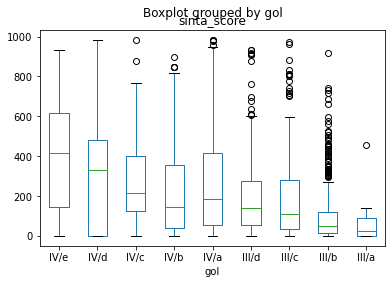

In [38]:
df3.boxplot(by ='gol', column =['sinta_score'], grid = False)

### Boxplot untuk menampilkan atribut sinta_3yr_score  berdasarkan atribut gol

<AxesSubplot:title={'center':'sinta_3yr_score'}, xlabel='gol'>

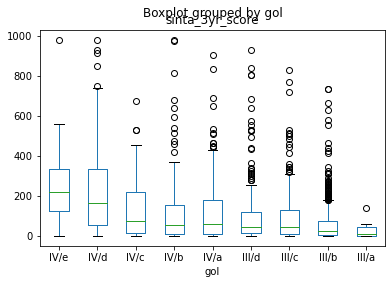

In [39]:
df3.boxplot(by ='gol', column =['sinta_3yr_score'], grid = False)

### Boxplot untuk menampilkan atribut scopus_h_index  berdasarkan atribut gol

<AxesSubplot:title={'center':'scopus_h_index'}, xlabel='gol'>

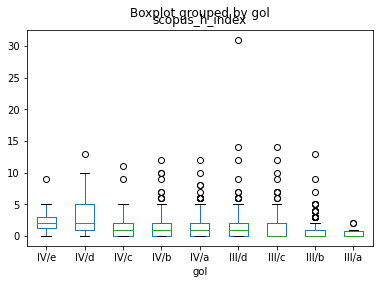

In [40]:
df3.boxplot(by ='gol', column =['scopus_h_index'], grid = False)

### Boxplot untuk menampilkan atribut googlescholar_h_index  berdasarkan atribut gol

<AxesSubplot:title={'center':'googlescholar_h_index'}, xlabel='gol'>

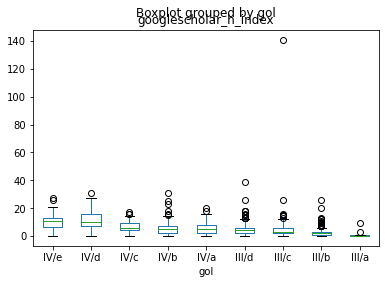

In [41]:
df3.boxplot(by ='gol', column =['googlescholar_h_index'], grid = False)

### Membandingkan rata-rata atribut scopus_h_index dan googlescholar_h_index di tiap fakultas

<AxesSubplot:xlabel='fakultas'>

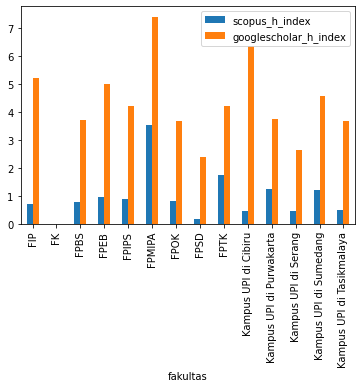

In [42]:
df_groups1 = df3.groupby(['fakultas'])[['scopus_h_index', 'googlescholar_h_index']].mean()
df_groups1.plot(kind='bar')

### Membandingkan rata-rata atribut sinta_3yr_score dan sinta_score di tiap fakultas

<AxesSubplot:xlabel='fakultas'>

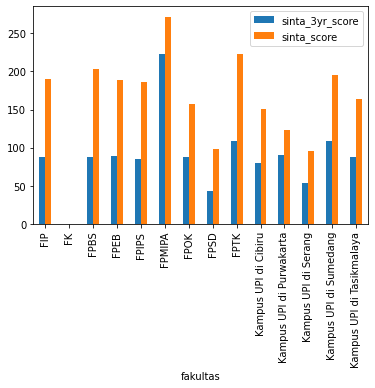

In [43]:
df_groups1 = df3.groupby(['fakultas'])[['sinta_3yr_score', 'sinta_score']].mean()
df_groups1.plot(kind='bar')

### Menampilkan tahun lahir di tiap golongan berdasarkan pendidikan terakhirnya

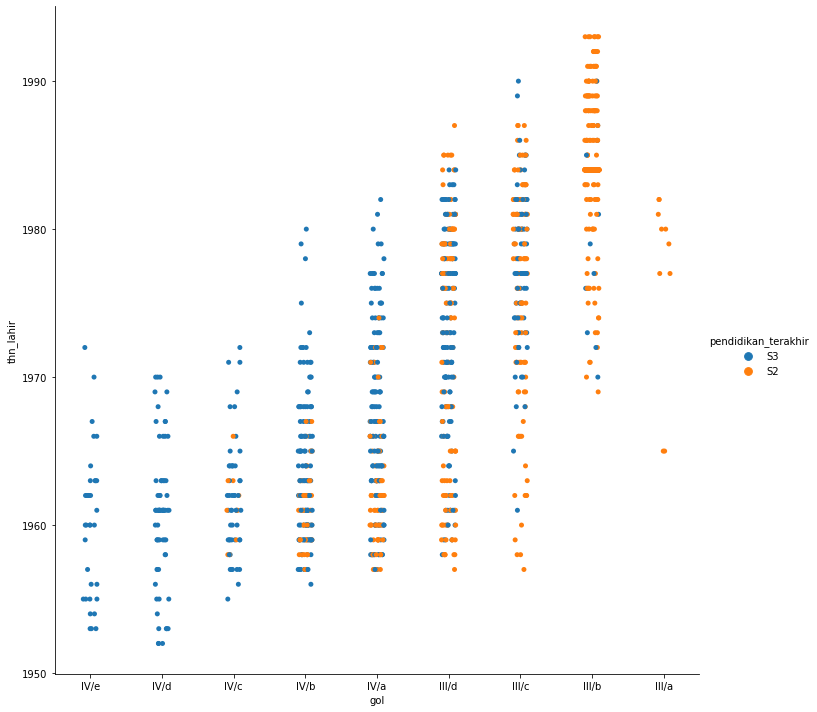

In [44]:
sns.catplot(x="gol", y="thn_lahir", hue="pendidikan_terakhir", data=df3, height=10)

<function seaborn.distributions.distplot(a=None, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None, x=None)>